In [8]:
import numpy as np
import pylab as plt
import random
from numpy import e
%matplotlib inline

In [9]:
def gaussian_model(mu, sigma, x):
    P = (2*np.pi*sigma**2)**(-1)*e**(-(mu-x)**2/(2*sigma**2))
    return P

In [10]:
def logL(theta, x, y):
    return -.5 * np.sum((y-gaussian_model(mu = theta[0], sigma = theta[1], x = x))**2 / theta[1]**2 + np.log(2*np.pi*theta[1]**2))

In [11]:
def lnprior(theta):
    if theta[0] < 10. and theta[1] < 10.:
        return 0.
    else:
        return -np.inf

In [12]:
def lnprob(theta, x, y):
    return lnprior(theta) + logL(theta, x, y)

In [18]:
def Gaussian_MCMC(nsteps, x, y):
    import numpy as np
    n = 0
    thetas = [(.3,.1)]
    probs = []
    probs.append(lnprob(thetas[0], x, y))
    while n < nsteps:
        theta_guess = .001*np.array(random.sample(range(1,10000), 2))
        prob_calc = lnprob(theta_guess, x, y)
        if prob_calc > probs[n]:
            probs.append(prob_calc)
            thetas.append(theta_guess)
        else:
            if prob_calc > random.uniform(.25, .5):
                probs.append(prob_calc)
                thetas.append(theta_guess)
            else:
                probs.append(probs[n])
                thetas.append(thetas[n])
        n+= 1
    thetas[::-1].pop()
    thetas[::-1].pop()
    probs[::-1].pop()
    probs[::-1].pop()
    thetas = np.asarray(thetas)
    return probs, thetas

In [19]:
x = np.linspace(-5,15,500)
y = gaussian_model(mu = 5, sigma = 1, x = x)

probs, thetas = Gaussian_MCMC(50000, x, y)

[[ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]
 [ 5.014  0.334]]


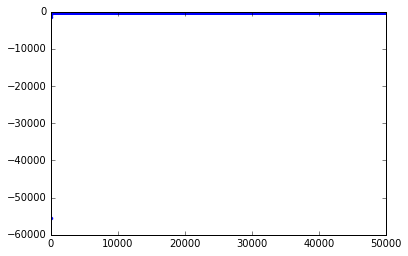

In [22]:
plt.plot(probs, '.')
print(thetas[-30:-1,0:])

4.99383797083


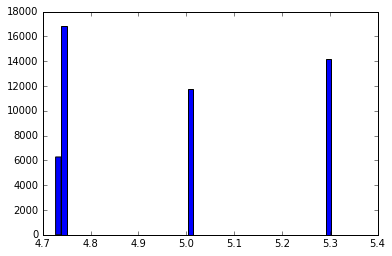

In [21]:
plt.hist(thetas[1000:,0], bins = 50)
print(np.mean(thetas[10:,0]))

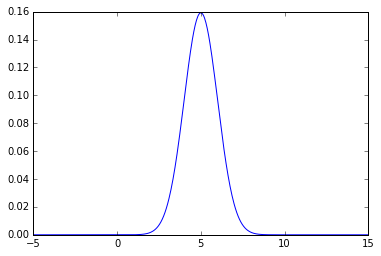

In [17]:
plt.plot(x,y)